# Estimation of COVID-19 Pandemic

## Loading Data

We will use data on COVID-19 infected individuals, provided by the [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE) at [Johns Hopkins University](https://jhu.edu/). Dataset is available in [this GitHub Repository](https://github.com/CSSEGISandData/COVID-19).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

We can load the most recent data directly from GitHub using `pd.read_csv`. If for some reason the data is not available, you can always use the copy available locally in the `data` folder - just uncomment the line below that defines `base_url`:

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
countries= pd.read_csv(countries_dataset_url)# table country
countries.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.94990,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0


Let's now load the data for infected individuals and see how the data looks like:

In [127]:
infected = pd.read_csv(infected_dataset_url)

infected[infected['Country/Region'] == 'China'].head()# ở đây số liệu một ngày là số ca mắc tính từ đầu đại dịch đến thời  điểm ngày đó


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742


We can see that each row of the table defines the number of infected individuals for each country and/or province, and columns correspond to dates. Similar tables can be loaded for other data, such as number of recovered and number of deaths.

In [128]:
recovered = pd.read_csv(recovered_dataset_url)
recovered[:3]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
deaths = pd.read_csv(deaths_dataset_url)
deaths[:3]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881


## Making Sense of the Data
From the table above the role of province column is not clear. Let's see the different values that are present in `Province/State` column:

In [130]:
infected['Province/State'].value_counts()[:10]


Province/State
Australian Capital Territory    1
New South Wales                 1
Northern Territory              1
Queensland                      1
South Australia                 1
Tasmania                        1
Victoria                        1
Western Australia               1
Alberta                         1
British Columbia                1
Name: count, dtype: int64

From the names we can deduce that countries like Australia and China have more detailed breakdown by provinces. Let's look for information on China to see the example:

## Pre-processing the Data 

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info for the whole country. This can be done using `groupby`:

In [133]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()


,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


You can see that due to using `groupby` all DataFrames are now indexed by Country/Region. We can thus access the data for a specific country by using `.loc`:|

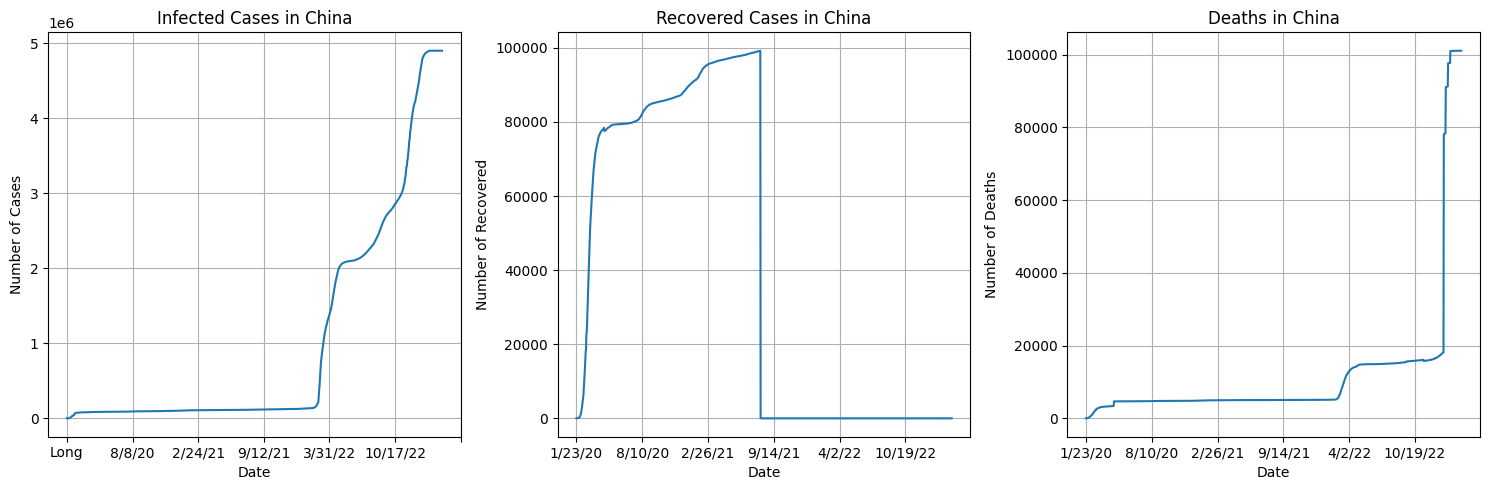

In [96]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Vẽ biểu đồ cho ca nhiễm
infected.loc['China'][2:].plot(ax=axs[0], title='Infected Cases in China', xlabel='Date', ylabel='Number of Cases')
axs[0].grid()

recovered.loc['China'][2:].plot(ax=axs[1], title='Recovered Cases in China', xlabel='Date', ylabel='Number of Recovered')
axs[1].grid()


deaths.loc['China'][2:].plot(ax=axs[2], title='Deaths in China', xlabel='Date', ylabel='Number of Deaths')
axs[2].grid()

plt.tight_layout()  
plt.show()


> **Note** how we use `[2:]` to remove first two elements of a sequence that contain geolocation of a country. We can also drop those two columns altogether:

In [134]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the data on infections indexed by date:

In [135]:
# remove the firsr row because the index is Provice/State not be a date time format
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})

    if df.index[0] == 'Province/State': # fix that
        df = df.iloc[1:]
    df.index = pd.to_datetime(df.index)   
    return df

df_china = mkframe('US')
df_china  

C:\Users\KyDN\AppData\Local\Temp\ipykernel_5972\3506708987.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


,infected,recovered,deaths
2020-01-22,1,0,0
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


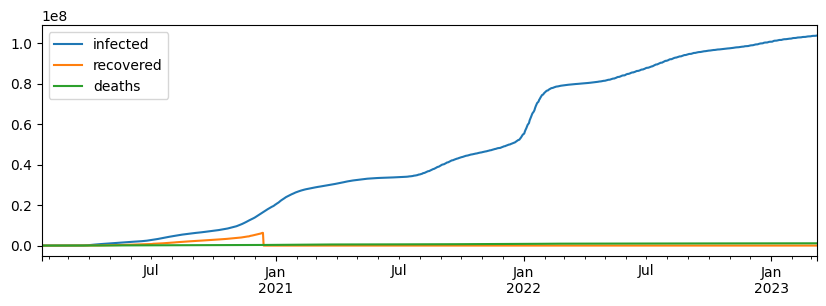

In [119]:
df_china.plot()
plt.show()

Now let's compute the number of new infected people each day. This will allow us to see the speed at which pandemic progresses. The easiest way to do it is to use `diff`:

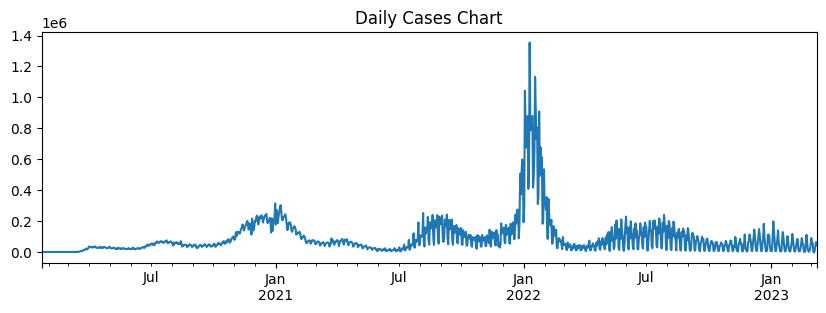

In [137]:
df_china['ninfected'] = df_china['infected'].diff() # số lượng ca mắc của một ngày

df_china['ninfected'].plot()
plt.title("Daily Cases Chart")
plt.show()

We can see high fluctuations in data. Let's look closer at one of the months:

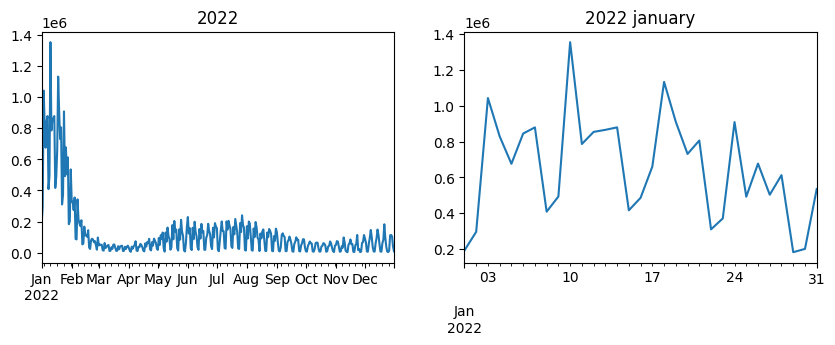

In [138]:
plt.subplot(121)
plt.title(2022)
df_china[(df_china.index.year==2022)]['ninfected'].plot()
plt.subplot(122)
plt.title('2022 january')
df_china[(df_china.index.year==2022) & (df_china.index.month==1)]['ninfected'].plot()
plt.show()


It clearly looks like there are weekly fluctuations in data. Because we want to be able to see the trends, it makes sense to smooth out the curve by computing running average (i.e. for each day we will compute the average value of the previous several days):

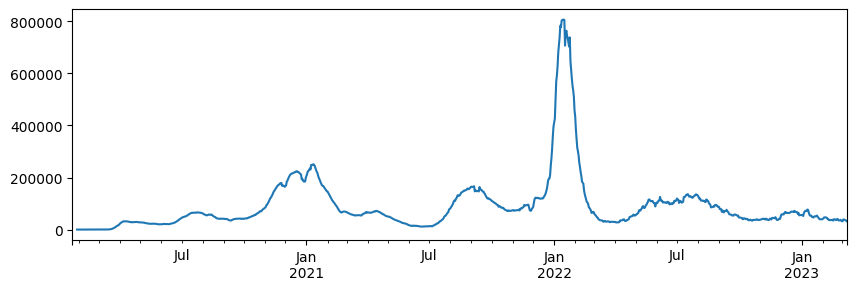

In [139]:
df_china['ninfav'] = df_china['ninfected'].rolling(window=7).mean() # calc avg value of 7 previous day
df_china['ninfav'].plot()
plt.show()

In order to be able to compare several countries, we might want to take the country's population into account, and compare the percentage of infected individuals with respect to country's population. In order to get country's population, let's load the dataset of countries:

In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4191,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4192,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4193,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4194,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


Because this dataset contains information on both countries and provinces, to get the population of the whole country we need to be a little bit clever: 

In [145]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
915,840,US,USA,840.0,NaN,NaN,NaN,US,40.0,-100.0,US,329466283.0


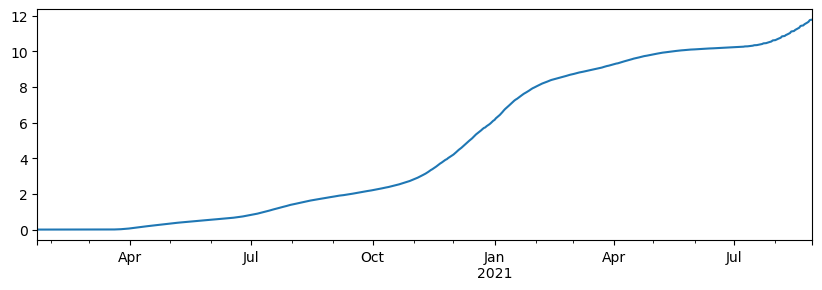

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df_china['pinfected'] = df_china['infected']*100 / pop
df_china['pinfected'].plot(figsize=(10,3))
plt.show()


## Computing $R_t$

To see how infectious is the disease, we look at the **basic reproduction number** $R_0$, which indicated the number of people that an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$R_0$ is a property of the disease itself, and does not take into account some protective measures that people may take to slow down the pandemic. During the pandemic progression, we can estimate the reproduction number $R_t$ at any given time $t$. It has been shown that this number can be roughly estimated by taking a window of 8 days, and computing $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
where $I_t$ is the number of newly infected individuals on day $t$.

Let's compute $R_t$ for our pandemic data. To do this, we will take a rolling window of 8 `ninfected` values, and apply the function to compute the ratio above:

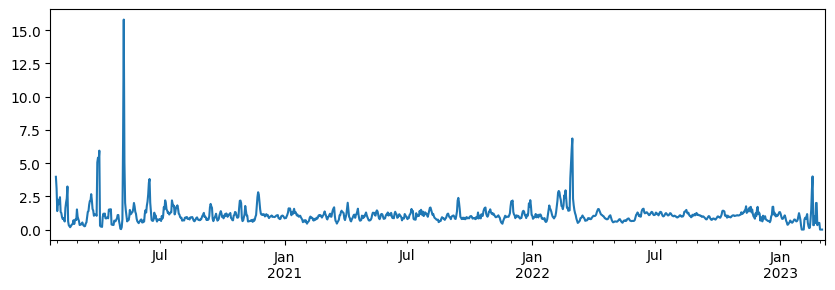

In [161]:
df_china['Rt'] = df_china['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())# thực hiện lấy giá trị 8 ngày trước ngày t và thực hiện tính toán Rt theo công thức
df_china['Rt'].plot()
plt.show()


You can see that there are some gaps in the graph. Those can be caused by either `NaN`, if  `inf` values being present in the dataset. `inf` may be caused by division by 0, and `NaN` can indicate missing data, or no data available to compute the result (like in the very beginning of our frame, where rolling window of width 8 is not yet available). To make the graph nicer, we need to fill those values using `replace` and `fillna` function.

Let's further look at the beginning of the pandemic. We will also limit the y-axis values to show only values below 6, in order to see better, and draw horizontal line at 1.

C:\Users\KyDN\AppData\Local\Temp\ipykernel_5184\1185287630.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ax = df_china[df_china.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3)) # thực hiện padding các giá trị nan và inf


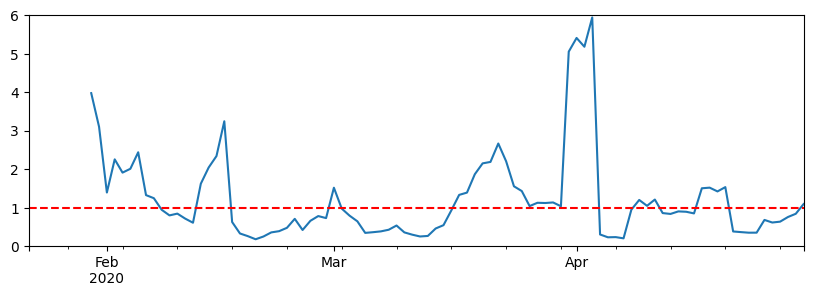

In [162]:
ax = df_china[df_china.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3)) # thực hiện padding các giá trị nan và inf
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')# vẽ đường thẳng  y=1 để thực hiện xem xét các khoảng thời gian dịch bệnh có xu hướng như thế nào

plt.show()

Another interesting indicator of the pandemic is the **derivative**, or **daily difference** in new cases. It allows us to see clearly when pandemic is increasing or declining. 

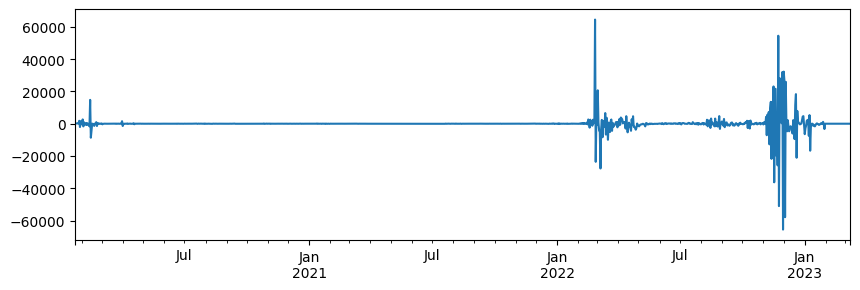

In [163]:
df_china['ninfected'].diff().plot() # xem xét 'tốc độ' tăng giảm của dịch bệnh qua từng ngày
plt.show()

Given the fact that there are a lot of fluctuations in data caused by reporting, it makes sense to smooth the curve by running rolling average to get the overall picture. Let's again focus on the first months of the pandemic:

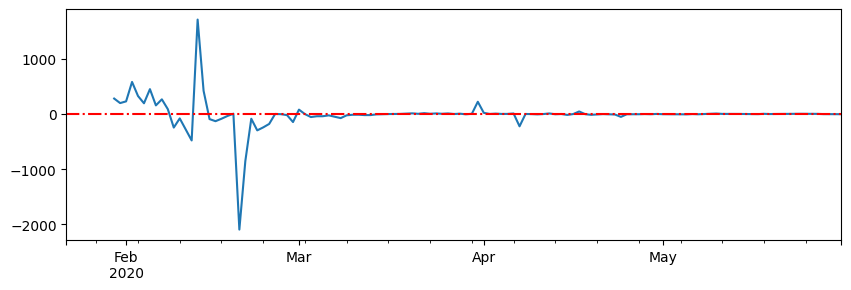

In [157]:
ax=df_china[df_china.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot() # thực hiện làm mềm curve thông qua thực hiện tính mean của 7 ngày trước của giá trị diff()
ax.axhline(0,linestyle='-.',color='red')
plt.show()


## Challenge

Now it is time for you to play more with the code and data! Here are a few suggestions you can experiment with:
* See the spread of the pandemic in different countries.
* Plot $R_t$ graphs for several countries on one plot for comparison, or make several plots side-by-side
* See how the number of deaths and recoveries correlate with number of infected cases.
* Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.
* Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

### Plot $R_t$ graphs for several countries on one plot for comparison, or make several plots side-by-side

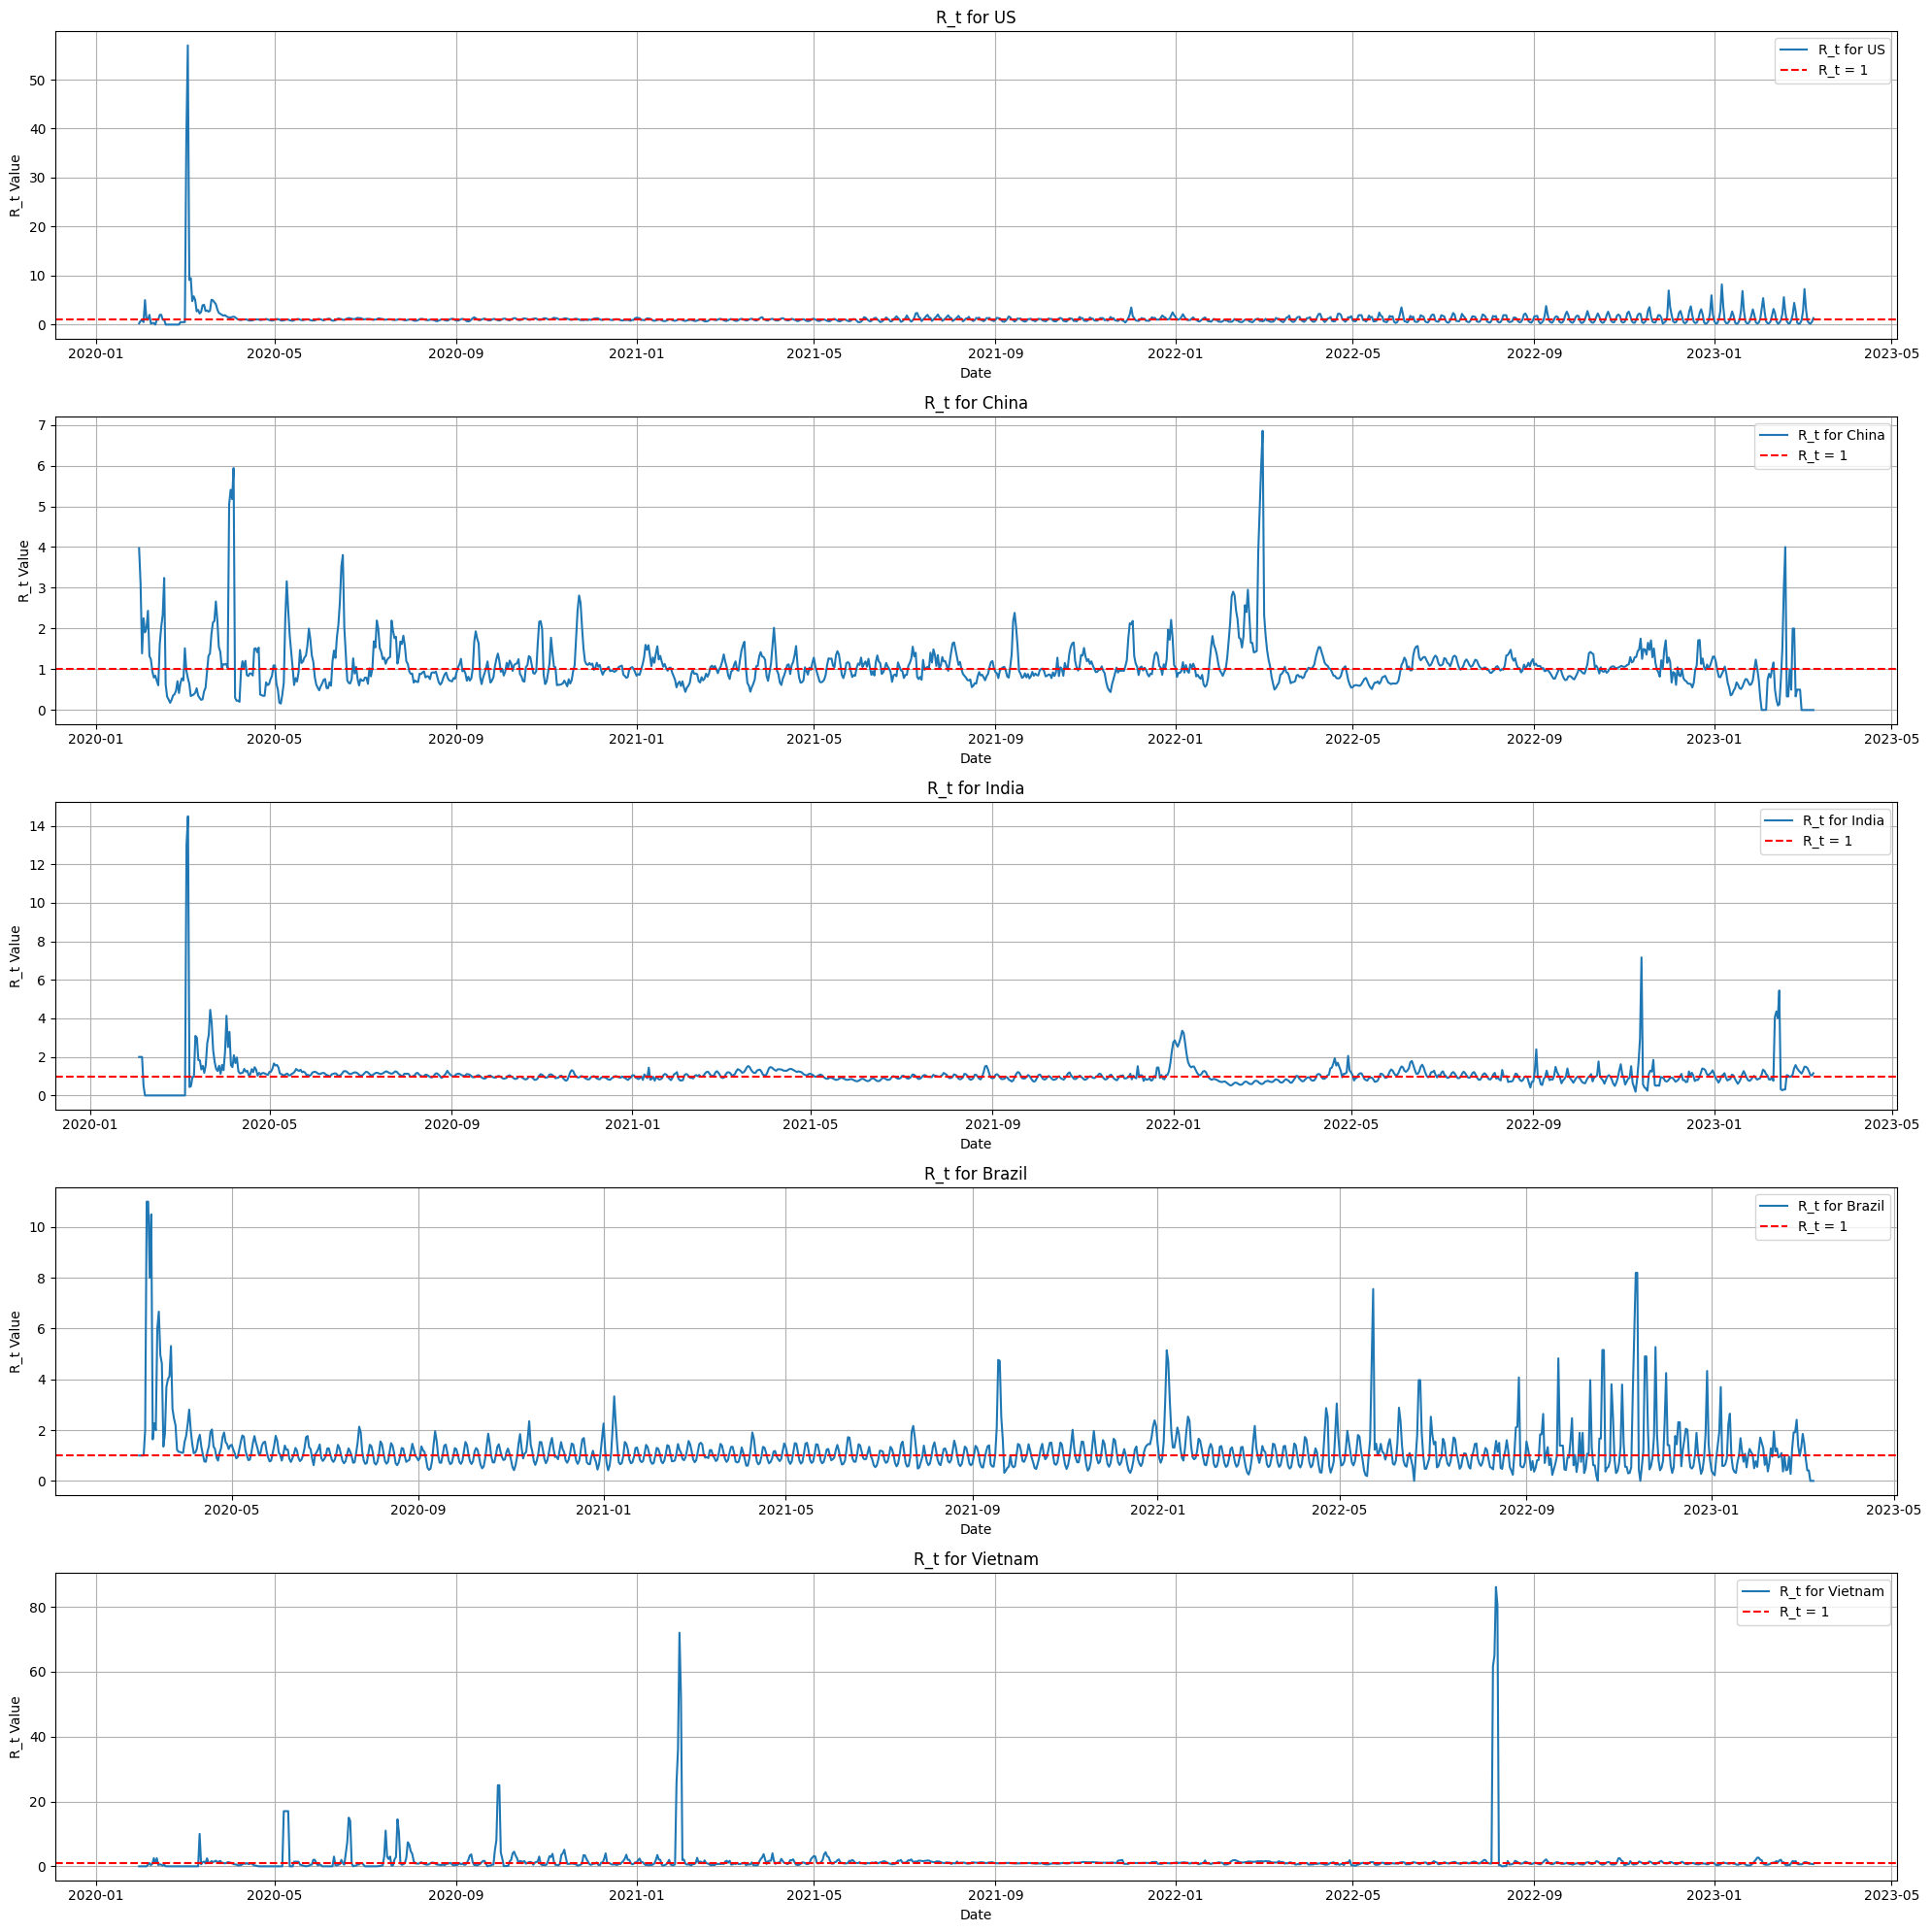

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Thực hiện hiển thị đồ thi Rt đối với từng quốc gia trong một khoảng thời gian nhất định

countries_to_plot = ['US', 'China', 'India', 'Brazil', 'Vietnam'] # you can change this list


def plot_Rt(country, time_interval):
    infected = pd.read_csv(infected_dataset_url)
    recovered = pd.read_csv(recovered_dataset_url)
    deaths = pd.read_csv(deaths_dataset_url)
    countries = pd.read_csv(countries_dataset_url)

    infected = infected.groupby('Country/Region').sum()
    recovered = recovered.groupby('Country/Region').sum()
    deaths = deaths.groupby('Country/Region').sum()

    infected.drop(columns=['Lat', 'Long'], inplace=True)
    recovered.drop(columns=['Lat', 'Long'], inplace=True)
    deaths.drop(columns=['Lat', 'Long'], inplace=True)

    df = pd.DataFrame({
        'infected': infected.loc[country],
        'recovered': recovered.loc[country],
        'deaths': deaths.loc[country]
    })

    if 'Province/State' in df.index:
        df = df.iloc[1:]

    df.index = pd.to_datetime(df.index, format='%m/%d/%y')
    df['ninfected'] = df['infected'].diff().clip(lower=0) 
    df['Rt'] = df['ninfected'].rolling(8).apply(
        lambda x: np.nan if x[:4].sum() == 0 else x[4:].sum() / x[:4].sum(),
        raw=True
    )
    df['Rt'] = df['Rt'].replace([np.inf, -np.inf], np.nan).ffill() 
    return df[(df.index >= time_interval[0])& (df.index <= time_interval[1])]['Rt']



def compare_Rt(country_list, time_interval):
    fig, ax = plt.subplots( len(country_list), 1, figsize=(20, 20)) 
    for i, country in enumerate(country_list):
        df_Rt = plot_Rt(country, time_interval)
        ax[i].plot(df_Rt.index, df_Rt, label=f'R_t for {country}')
        ax[i].set_title(f'R_t for {country}')
        ax[i].set_xlabel('Date')
        ax[i].set_ylabel('R_t Value')
        ax[i].axhline(y=1, color='r', linestyle='--', label='R_t = 1') 
        ax[i].legend()
        ax[i].grid()  

    plt.tight_layout()
    plt.show()

compare_Rt(countries_to_plot, ("2020-01-22", "2023-03-09"))

Chúng ta có thể thấy rằng ở hầu hết các quốc gia thì số tỷ lệ covid tăng mạnh ở tháng 3 và thàng 4 năm 2020, đối với Việt Nam thì ta có thể thấy rõ có các đợt bùng phát mạnh vào đầu tháng 2 năm 2021 và tháng 8 năm 2022

Display additional parameters for a country

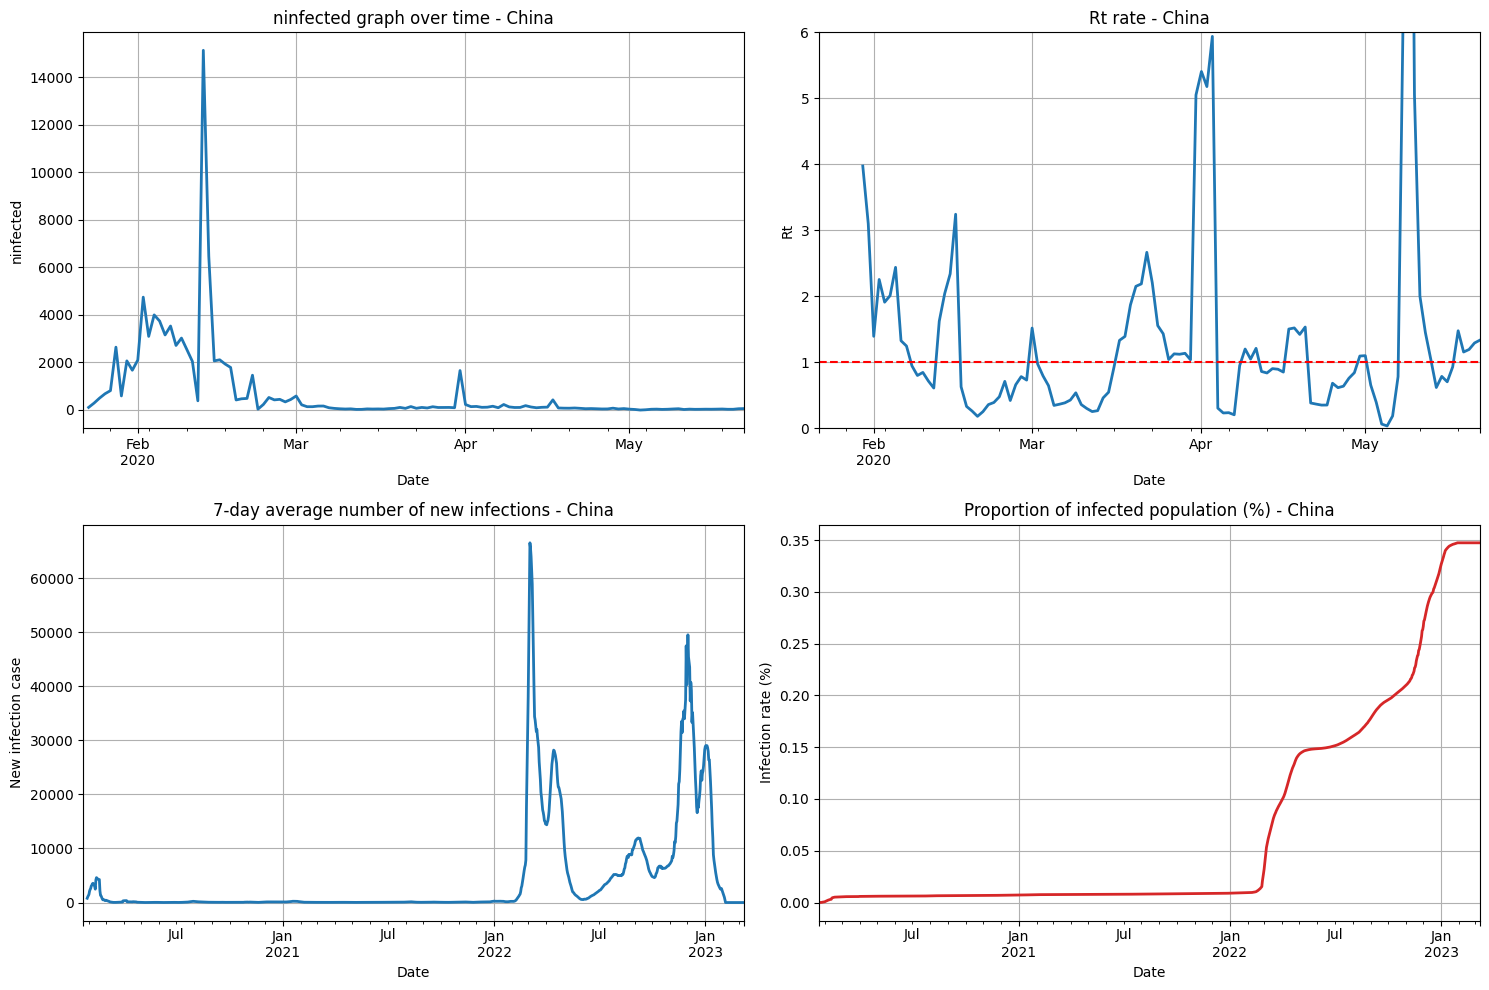

,infected,recovered,deaths,ninfected,ninfav,pinfected,Rt
2020-01-22,548,28,17,NaN,NaN,0.000039,NaN
2020-01-23,643,30,18,95,NaN,0.000046,NaN
2020-01-24,920,36,26,277,NaN,0.000065,NaN
2020-01-25,1406,39,42,486,NaN,0.0001,NaN
2020-01-26,2075,49,56,669,NaN,0.000147,NaN
...,...,...,...,...,...,...,...
2023-03-05,4903524,0,101054,0,0.0,0.34733,0.0
2023-03-06,4903524,0,101055,0,0.0,0.34733,0.0
2023-03-07,4903524,0,101055,0,0.0,0.34733,0.0
2023-03-08,4903524,0,101055,0,0.0,0.34733,0.0


In [140]:
def plot_all(country, time_interval):
    infected = pd.read_csv(infected_dataset_url)
    recovered = pd.read_csv(recovered_dataset_url)
    deaths = pd.read_csv(deaths_dataset_url)
    countries = pd.read_csv(countries_dataset_url)

    infected = infected.groupby('Country/Region').sum()
    recovered = recovered.groupby('Country/Region').sum()
    deaths = deaths.groupby('Country/Region').sum()

    infected.drop(columns=['Lat', 'Long'], inplace=True)
    recovered.drop(columns=['Lat', 'Long'], inplace=True)
    deaths.drop(columns=['Lat', 'Long'], inplace=True)

    df = pd.DataFrame({
        'infected': infected.loc[country],
        'recovered': recovered.loc[country],
        'deaths': deaths.loc[country]
    })

    if 'Province/State' in df.index:
        df = df.iloc[1:]

    df.index = pd.to_datetime(df.index, format= '%m/%d/%y')

    # Tính số ca nhiễm mới và trung bình trượt 7 ngày
    df['ninfected'] = df['infected'].diff()
    df['ninfav'] = df['ninfected'].rolling(window=7).mean()

    # Tính tỷ lệ dân số nhiễm bệnh
    df['pinfected'] = df['infected'] / countries[countries['Country_Region'] == country]['Population'].values[0] * 100

    df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum() / x[:4].sum() if len(x) >= 8 and x[:4].sum() != 0 else np.nan)
    df['Rt'] = df['Rt'].replace(np.inf, np.nan).ffill()


  
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))


    df[(df.index >= time_interval[0]) & ( df.index <= time_interval[1])]['ninfected'].plot(ax=axes[0, 0], color='tab:blue', linewidth=2)
    axes[0, 0].set_title(f'ninfected graph over time - {country}')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('ninfected')
    axes[0, 0].grid(True)


    df['ninfav'].plot(ax=axes[1, 0], color='tab:blue', linewidth=2)
    axes[1, 0].set_title(f'7-day average number of new infections - {country}')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('New infection case')
    axes[1, 0].grid(True)

    # Plot Rt rate
    df[(df.index >= time_interval[0]) & ( df.index <= time_interval[1])]['Rt'].plot(ax=axes[0, 1], color='tab:blue', linewidth=2) # Hiển
    axes[0, 1].set_title(f'Rt rate - {country}')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Rt')
    axes[0, 1].set_ylim([0,6])
    axes[0, 1].axhline(1,linestyle='--',color='red')
    axes[0, 1].grid(True)

    # Plot 2: Tỷ lệ dân số nhiễm bệnh (%)
    df['pinfected'].plot(ax=axes[1, 1], color='tab:red', linewidth=2)
    axes[1, 1].set_title(f'Proportion of infected population (%) - {country}')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Infection rate (%)')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

    return df

plot_all('China', ("2020-01-22", "2020-05-22"))

## See how the number of deaths and recoveries correlate with number of infected cases.

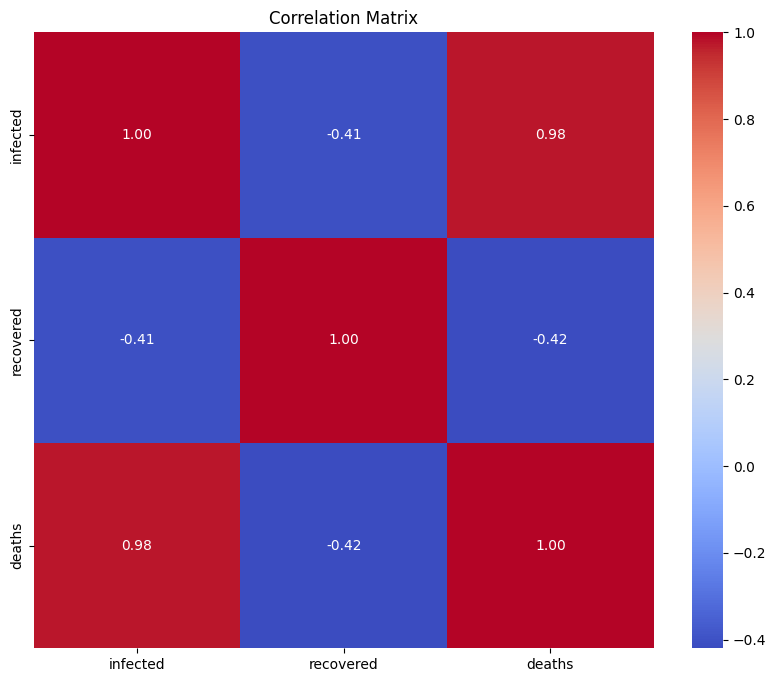

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assume infected, recovered, and deaths DataFrames are already defined and loaded
# Replace 'US' with the country of your choice if needed


def plot_heatmap(country):
    infected = pd.read_csv(infected_dataset_url)
    recovered = pd.read_csv(recovered_dataset_url)
    deaths = pd.read_csv(deaths_dataset_url)

    infected = infected.groupby('Country/Region').sum()
    recovered = recovered.groupby('Country/Region').sum()
    deaths = deaths.groupby('Country/Region').sum()

    infected.drop(columns=['Lat', 'Long'], inplace=True)
    recovered.drop(columns=['Lat', 'Long'], inplace=True)
    deaths.drop(columns=['Lat', 'Long'], inplace=True)

    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})

    df = df.iloc[1:]
    df.index = pd.to_datetime(df.index, format= '%m/%d/%y' )   
    
    
    correlation_matrix = df.corr()
    correlation_matrix

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

plot_heatmap('US')

 Ta nhân thấy hệ số tương quan giữa number of infected và death là 0.98 tức là số lượng ca chết tăng (giảm) tuyến tính đối với số ca nhiễm, như vậy tỷ lệ thiệt mạng của căn bệnh rất cao

 Ta cũng nhận thấy rằng hệ số tương quan giữa số ca recovered và số ca infected là -0.42 như vậy hai thông số này có chiều hướng nghịch biến nhưng không tuyến tính, cụ thể là khi số ca infected tăng lên thì số ca recovered có xu hướng giảm. 

 ==> Như vậy nếu số lượng infected tăng lên thì phải cung cấp giường bệnh và chăm sóc y tế cho những người này trong khi các nguồn lực như bác sĩ và giường bệnh là không đổi (hoặc tăng không đáng kể so với số ca nhiễm mới) vậy thì những ca bệnh trước sẽ nhận được sự chăm sóc ít hơn do vậy tỷ lệ chết sẽ cao hơn và tỷ lệ phục hồi thấp hơn

## Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out.

Thực hiện tính toán theo tuần tổng hợp số ca nhiễm và tử vong trong một tuần, chuẩn hóa các giá trị theo công thức 
$$
x_i = \frac{X_i - \min(X_i)}{\max(X_i) - \min(X_i)}
$$

$$
y_i = \frac{Y_i - \min(Y_i)}{\max(Y_i) - \min(Y_i)}
$$

X_i
  và
Y_i
  lần lượt là số ca nhiễm và số ca tử vong trong tuần
i.
Việc chuẩn hóa giúp các chuỗi có cùng thang đo, tránh ảnh hưởng của quy mô dữ liệu đến kết quả phân tích.

Tính độ tương quan giữa các giá trị infected và deaths đã chuẩn hóa

Thực hiện tính toán này với các giá trị độ trễ
𝑘
k từ -6 tuần đến +6 tuần để tìm ra độ trễ tối ưu (tức là độ trễ mà hệ số tương quan đạt cực đại).
Kết quả là:
Độ trễ lớn nhất và có ý nghĩa thống kê cho biết khoảng thời gian từ khi ca nhiễm tăng đến khi số ca tử vong tăng lên.
Hệ số tương quan cao nhất (trong khoảng [-1, 1]) cho biết mức độ dự đoán chính xác của chuỗi ca nhiễm cho chuỗi ca tử vong.


In [5]:
import random

def make_framne(country):
    infected = pd.read_csv(infected_dataset_url)
    recovered = pd.read_csv(recovered_dataset_url)
    deaths = pd.read_csv(deaths_dataset_url)


    infected = infected.groupby('Country/Region').sum()
    recovered = recovered.groupby('Country/Region').sum()
    deaths = deaths.groupby('Country/Region').sum()

    infected.drop(columns=['Lat', 'Long'], inplace=True)
    recovered.drop(columns=['Lat', 'Long'], inplace=True)
    deaths.drop(columns=['Lat', 'Long'], inplace=True)

    try:
      df = pd.DataFrame({
          'infected': infected.loc[country],
          'recovered': recovered.loc[country],
          'deaths': deaths.loc[country]
      })
    except:
      return None

    if 'Province/State' in df.index:
        df = df.iloc[1:]
    df.index = pd.to_datetime(df.index, format= '%m/%d/%y')
    return df


def calc_lag_time_week(df):

    df['ninfected'] = pd.to_numeric(df['infected'], errors='coerce').diff().fillna(0).clip(lower=0)
    df['ndeaths'] = pd.to_numeric(df['deaths'], errors='coerce').diff().fillna(0).clip(lower=0)

    weekly_data = df.resample('W').sum()

    def normalize(series):
        return (series - series.min()) / (series.max() - series.min())

    weekly_data['normalized_ninfected'] = normalize(weekly_data['ninfected'])
    weekly_data['normalized_ndeaths'] = normalize(weekly_data['ndeaths'])

    lags = range(-6, 6)
    correlations = [weekly_data['normalized_ninfected'].corr(weekly_data['normalized_ndeaths'].shift(lag)) for lag in lags]

    # plt.figure(figsize=(10, 5))
    # plt.plot(lags, correlations, marker='o')
    # plt.axhline(0, linestyle='--', color='gray')
    # plt.xlabel('Lag (weeks)')
    # plt.ylabel('Cross-correlation')
    # plt.title('Cross-correlation between new cases and deaths')
    # plt.show()

    optimal_lag = lags[np.argmax(correlations)]
    return optimal_lag

countries = pd.read_csv(countries_dataset_url)

countries_list = countries['Country_Region'].unique()

week_lag = []
for country in countries_list:
    df = make_framne(country)
    if df is None:
        continue
    lag_time = calc_lag_time_week(df)
    week_lag.append(lag_time)
print('mean: ', np.mean(week_lag))
print('std: ', np.std(week_lag))

mean:  -1.4427860696517414
std:  1.5733983245088128


Nhận thấy rằng giá trị trung bình của lagtime đối với các quốc gia là 1.4 tuần tức là từ khi ca nhiễm bệnh đến lúc tử vong thời gian này kéo dài 1.4 tuần

Để chi tiết hơn ta thực hiện tính theo ngày, dựa vào giá trị trung bình trên ta thực hiện dịch chuyển thời gian deaths trong khoảng -14 đến -7 ngày để tìm ra khi dịch chuyển bao nhiêu ngày thì làm cho tương quan giữa infected và deaths lớn nhất 

In [23]:
def calc_lag_time_day(df):

    df['ninfected'] = pd.to_numeric(df['infected'], errors='coerce').diff().fillna(0).clip(lower=0)
    df['ndeaths'] = pd.to_numeric(df['deaths'], errors='coerce').diff().fillna(0).clip(lower=0)

    def normalize(series):
        return (series - series.min()) / (series.max() - series.min())

    df['normalized_ninfected'] = normalize(df['ninfected'])
    df['normalized_ndeaths'] = normalize(df['ndeaths'])

    lags = range(-14, -7)
    correlations = [df['normalized_ninfected'].corr(df['normalized_ndeaths'].shift(lag)) for lag in lags]

    # plt.figure(figsize=(10, 5))
    # plt.plot(lags, correlations, marker='o')
    # plt.axhline(0, linestyle='--', color='gray')
    # plt.xlabel('Lag (weeks)')
    # plt.ylabel('Cross-correlation')
    # plt.title('Cross-correlation between new cases and deaths')
    # plt.show()

    optimal_lag = lags[np.argmax(correlations)]
    return optimal_lag

day_lag = []
for country in countries_list:
    df = make_framne(country)
    if df is None:
        continue
    lag_time = calc_lag_time_day(df)
    day_lag.append(lag_time)
print('mean: ', np.mean(day_lag))
print('std: ', np.std(day_lag))

mean:  -11.970149253731343
std:  2.248073686760825


Như vậy căn bệnh này có thể kết luận là kéo dài khoảng: 12 ngày 

Nhận thấy một số điểm bất thường ở một số quốc gia là có lagtime rất lớn tức là họ có sự chậm trễ trong quá trình khai báo số ca tử vong hoặc là một số nước thì giá trị lag time nhỏ thể hiện sự chậm trễ trong việc khai báo số ca nhiễm, ta cần lấy trung bình  các quốc gia để lấy được giá trị đúng

## Calculate the fatality rate and how it changes over time. You may want to take into account the length of the disease in days to shift one time series before doing calculations

Tỷ lệ tử vong trong một thời điểm cụ thể:
 Fatality rate = $$R_t=\frac{Số \ ca \ tử \ vong \ tích \ lũy}{Số \ ca \ nhiễm \ tích \ lũy} * 100$$

 cần phải dịch chuyển một khoảng thời gian nhất định để tính được đúng tỷ lệ này, dựa vào kết quả tính được từ câu trên ta thực hiện dịch chuyển chuỗi thời gian đối với thông số deaths lên sớm hơn một khoảng là 12 ngày 

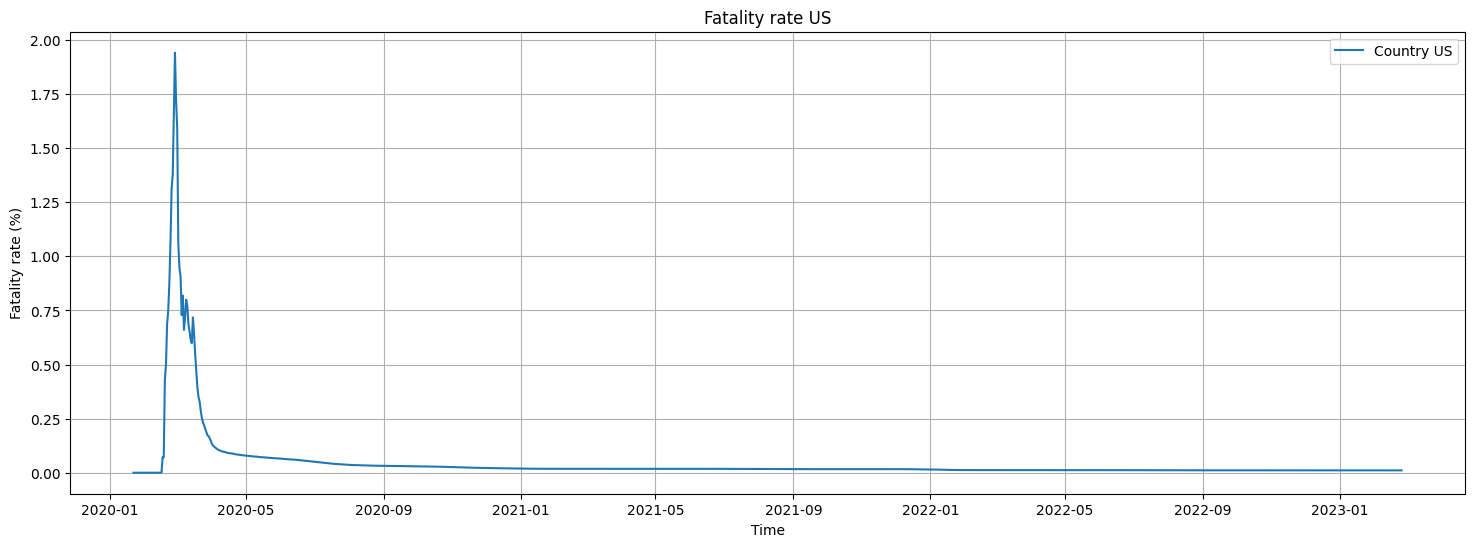

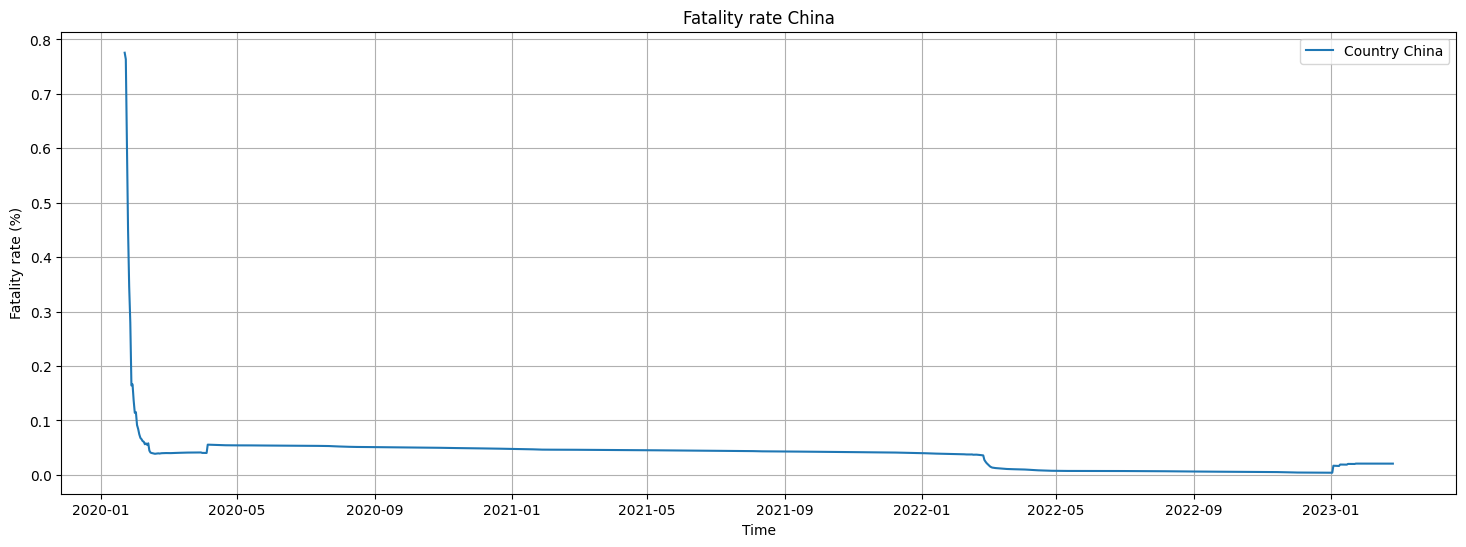

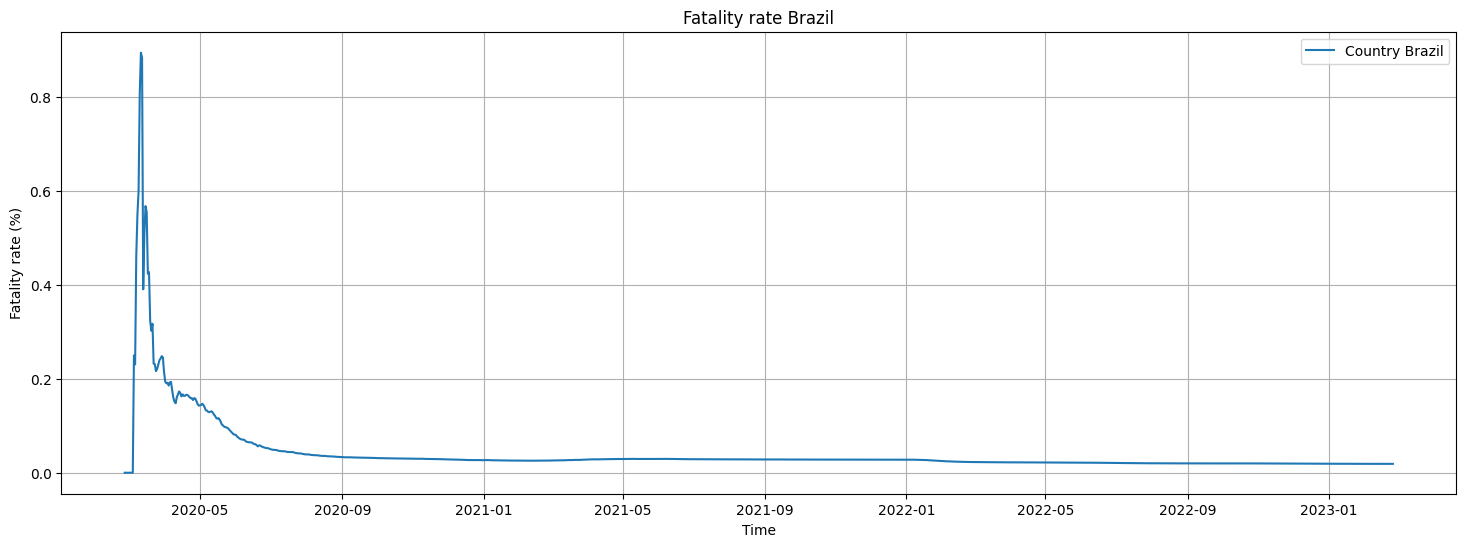

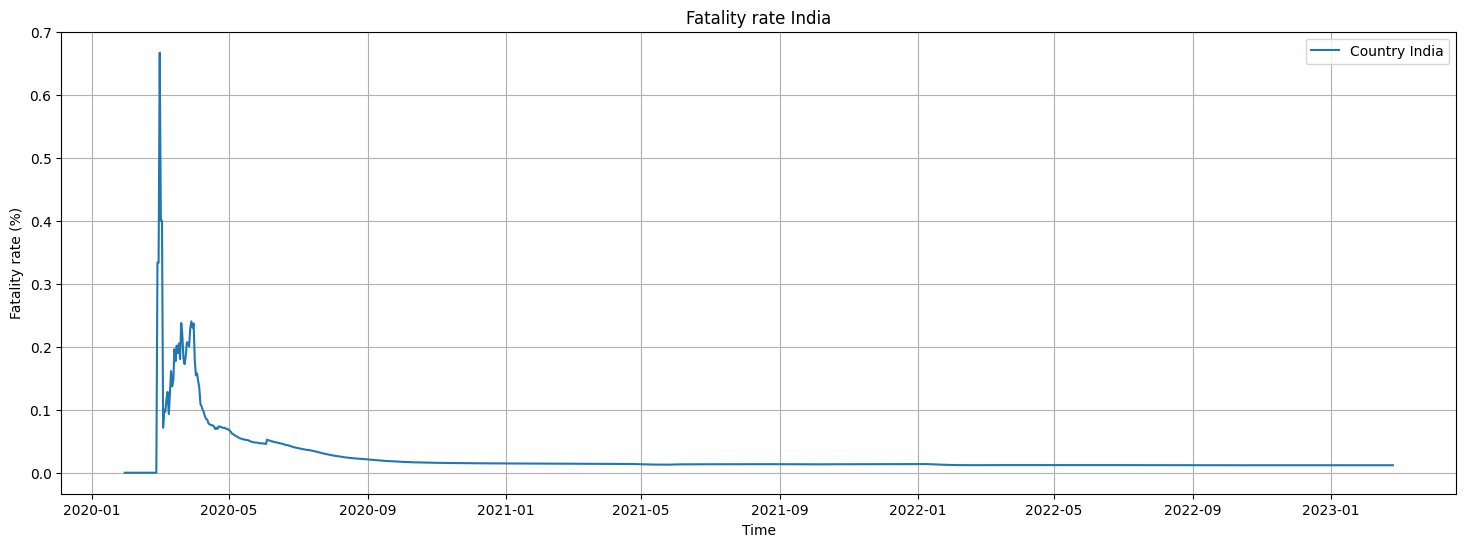

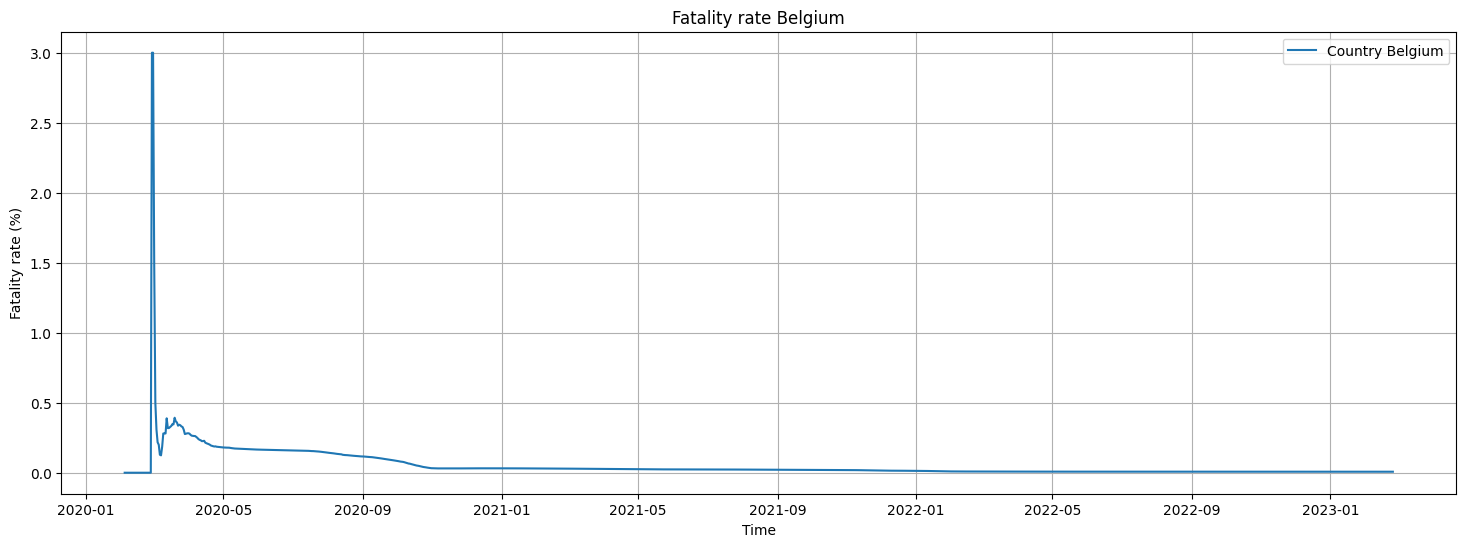

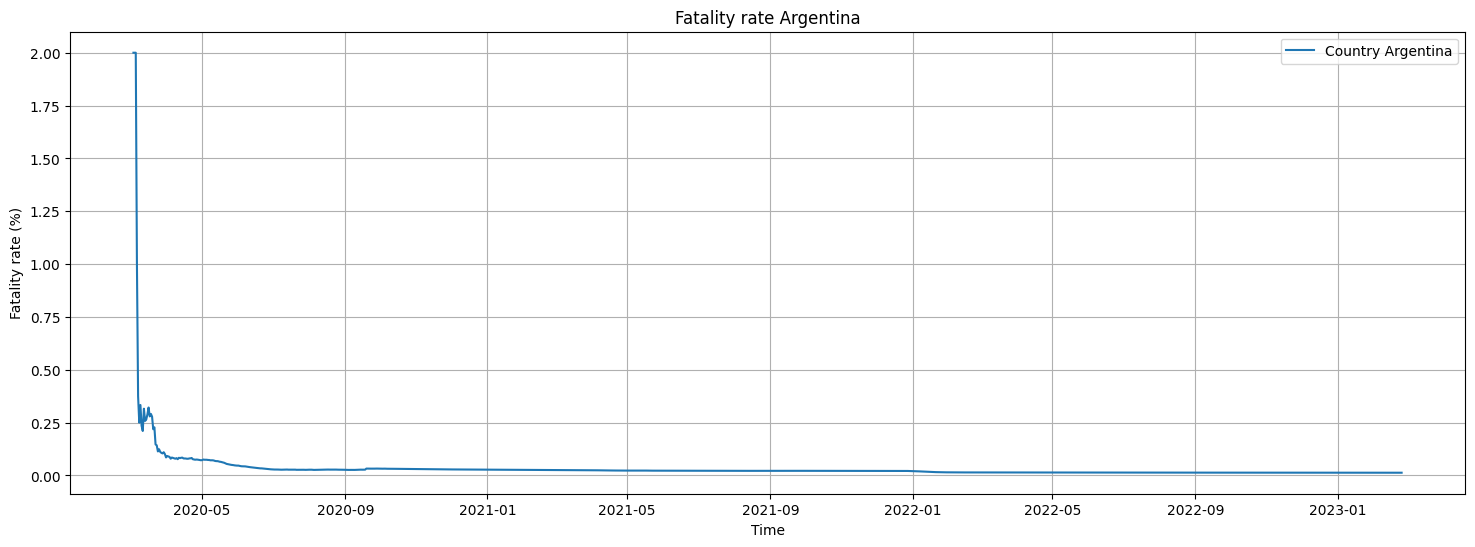

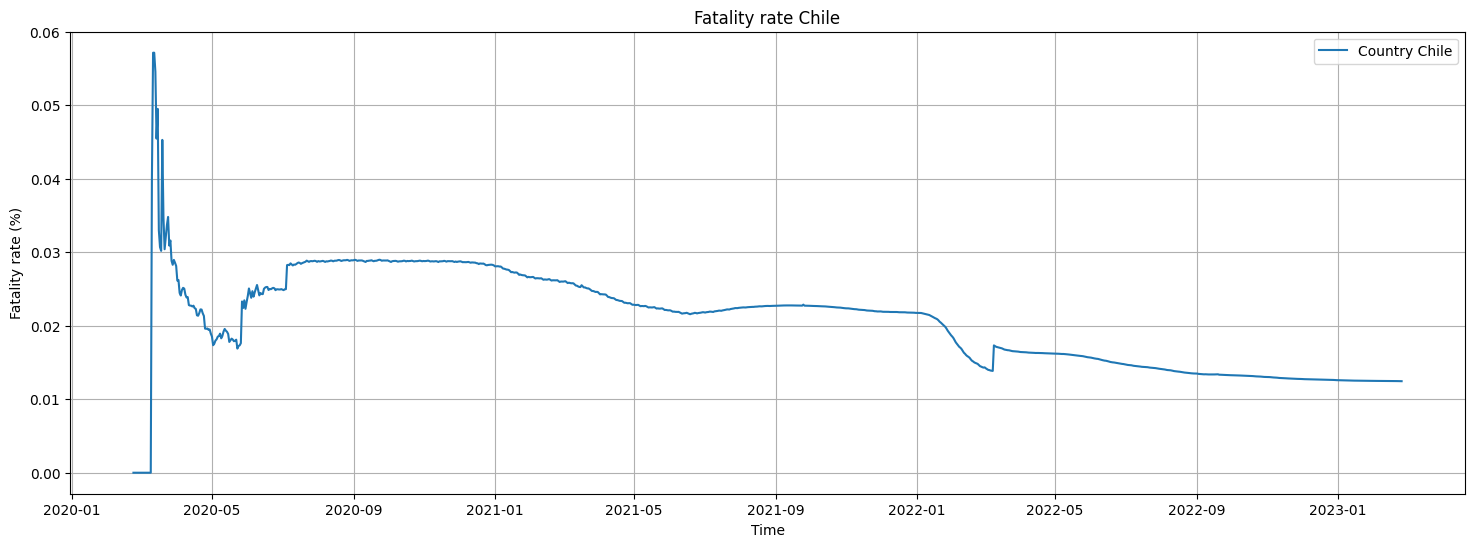

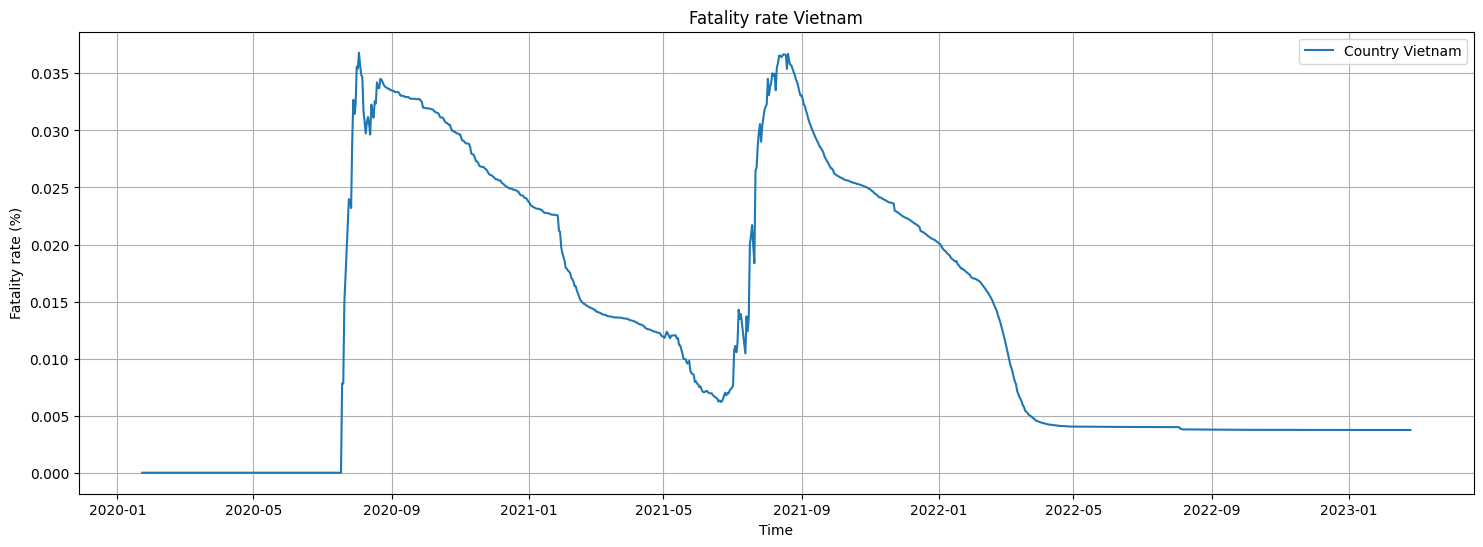

In [64]:
def calc_fatality_rate(country, lag_day):
    infected = pd.read_csv(infected_dataset_url)
    recovered = pd.read_csv(recovered_dataset_url)
    deaths = pd.read_csv(deaths_dataset_url)

    infected = infected.groupby('Country/Region').sum()
    recovered = recovered.groupby('Country/Region').sum()
    deaths = deaths.groupby('Country/Region').sum()

    infected.drop(columns=['Lat', 'Long'], inplace=True, errors='ignore')
    recovered.drop(columns=['Lat', 'Long'], inplace=True, errors='ignore')
    deaths.drop(columns=['Lat', 'Long'], inplace=True, errors='ignore')

    try:
        df = pd.DataFrame({
            'infected': infected.loc[country],
            'recovered': recovered.loc[country],
            'deaths': deaths.loc[country]
        })

    except KeyError:
        print(f"Không tìm thấy dữ liệu cho quốc gia: {country}")
        return None

    if 'Province/State' in df.index:
        df = df.iloc[1:]

    df.index = pd.to_datetime(df.index, format='%m/%d/%y')

    df['fatality_rate'] = df['deaths'].shift(lag_day)/ df['infected']
    
    plt.figure(figsize=(18, 6))
    plt.plot(df.index, df['fatality_rate'], label=f'Country {country}')
    plt.title(f'Fatality rate {country}')
    plt.xlabel('Time')
    plt.ylabel('Fatality rate (%)')
    plt.legend()
    plt.grid()
    plt.show()

countries_list = ['US', 'China', 'Brazil', 'India', 'Belgium','Argentina', 'Chile' , 'Vietnam']
for country in countries_list:
    calc_fatality_rate(country, -12)


Tỷ lệ tử vong do COVID-19 ban đầu rất lớn trong thời điểm dịch bùng phát nhưng sau đó có xu hướng giảm dần vì một số lý do sau:

Tiến bộ trong điều trị: Sự phát triển của các phương pháp điều trị mới, thuốc men hiệu quả hơn và cải thiện kỹ thuật y tế giúp giảm tỷ lệ tử vong.

Tiêm chủng: Việc triển khai vaccine đã làm giảm số lượng ca bệnh nặng và tử vong, đặc biệt là ở nhóm người dễ bị tổn thương.

Kiến thức và kinh nghiệm: Các bác sĩ và nhân viên y tế đã tích lũy được nhiều kinh nghiệm trong việc điều trị bệnh nhân, dẫn đến việc quản lý tốt hơn các ca nhiễm.

Phát hiện sớm: Các chương trình xét nghiệm và giám sát tốt hơn giúp phát hiện sớm và điều trị kịp thời, từ đó giảm tỷ lệ tử vong.

Biện pháp y tế công cộng: Các biện pháp như cách ly, hạn chế đi lại, và khuyến khích thực hành vệ sinh cá nhân đã giúp giảm sự lây lan của virus.

Tính chất của virus: Theo thời gian, một số virus có thể trở nên ít nguy hiểm hơn, có thể do biến thể mới xuất hiện,

Thay đổi dân số: Một phần của dân số có thể đã miễn dịch tự nhiên hoặc thông qua tiêm chủng, làm giảm tỷ lệ tử vong tổng thể.

## References

You may look at further studies of COVID epidemic spread in the following publications:
* [Sliding SIR Model for Rt Estimation during COVID Pandemic](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), blog post by [Dmitry Soshnikov](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [Estimation of Time-Dependent Reproduction Number for Global COVID-19 Outbreak](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [Code for the above paper on GitHub](https://github.com/shwars/SlidingSIR)